# Problem set 6¶


# P.2 Problem 2

In [5]:
library(dplyr)

In [6]:
df_quart = read.csv('quartet.csv')
df_quart %>% head(2)

x1,y1,x2,y2,x3,y3,x4,y4
10,8.04,10,9.14,10,7.46,8,6.58
8,6.95,8,8.14,8,6.77,8,5.76


## P.2.b
- PS6 corresponding problem: 2.b


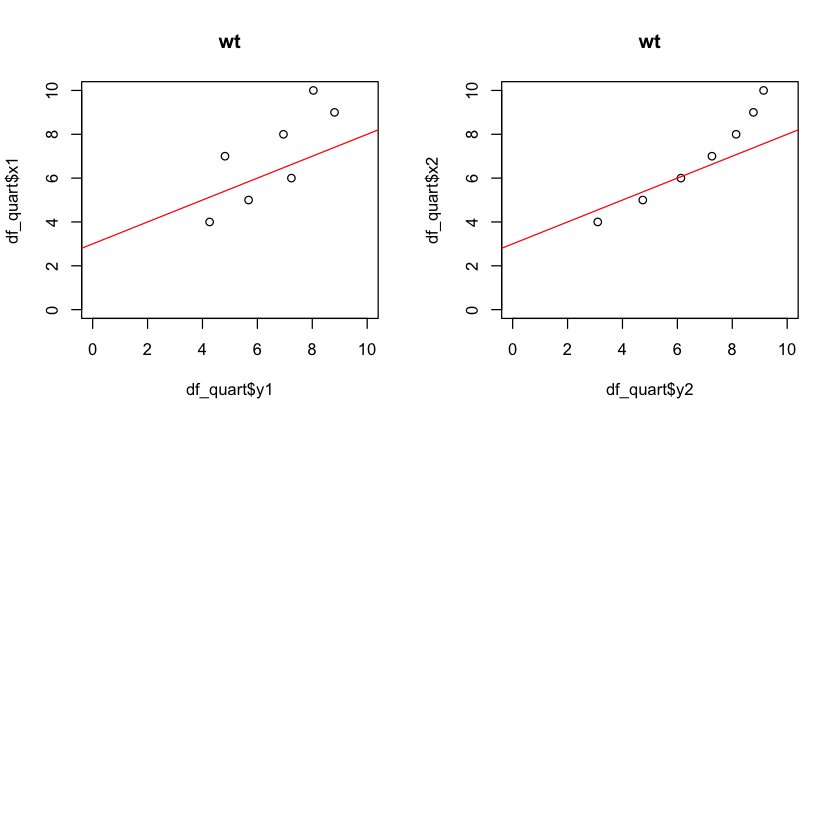

In [7]:
par(mfrow=c(2,2))

#Plot 1
plot(df_quart$y1, df_quart$x1,
     xlim = c(0,10),
     ylim= c(0,10),
     main='wt')
abline(lm(y1~x1, data= df_quart), col="red")

#Plot 2
plot(df_quart$y2, df_quart$x2,
     xlim = c(0,10),
     ylim= c(0,10),
     main='wt')
abline(lm(y1~x1, data= df_quart), col="red")


#Plot 3

#ADD data here!

#Plot 4

#ADD data here!


## P.2.C

- PS6 corresponding problem: 2.c

#### Notice that the R-squared are similar. Does this make sense given what you see in the graphs in P.2.B

In [12]:
summary(lm(y1~x1, data= df_quart))$r.squared

[1] 0.6665425

In [13]:
summary(lm(y2~x2, data= df_quart))$r.squared

[1] 0.666242

In [14]:
summary(lm(y3~x3, data= df_quart))$r.squared

[1] 0.6663241

In [15]:
summary(lm(y4~x4, data= df_quart))$r.squared

[1] 0.6667072

# P.3 Problem 3

In [16]:
df_safrica = read.csv('safrica.csv')
df_safrica %>% head(2)

wage,age,educ,exper,union,female,married,urban
13.706250,26,13,6,0,0,1,1
6.985119,31,8,16,0,0,1,1


## P.3.A

- PS6 corresponding problem: 2.a


In [18]:
reg_output_a = lm(wage~female, data=df_safrica)
reg_output_a


Call:
lm(formula = wage ~ female, data = df_safrica)

Coefficients:
(Intercept)       female  
     6.8505      -0.4122  


In [19]:
summary(reg_output_a)


Call:
lm(formula = wage ~ female, data = df_safrica)

Residuals:
    Min      1Q  Median      3Q     Max 
 -6.838  -4.394  -1.901   1.812 210.950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.85046    0.06864  99.796  < 2e-16 ***
female      -0.41216    0.11432  -3.605 0.000313 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.753 on 19946 degrees of freedom
Multiple R-squared:  0.0006512,	Adjusted R-squared:  0.0006011 
F-statistic:    13 on 1 and 19946 DF,  p-value: 0.0003126


## P.3.B Interpret regressions

- PS6 corresponding problem: 2.b



### Step 1: What do we want to predict? 
### Left hand side (LHS) is always what we are predicting
- In our case we want to predict wage GIVEN some information (Demographics, education, etc)

### Predicting Wage: Answer to 3.a


In [39]:
reg_3a = lm(wage~female, data=df_safrica)
reg_3a 


Call:
lm(formula = wage ~ female, data = df_safrica)

Coefficients:
(Intercept)       female  
     6.8505      -0.4122  


### Predicting female: NOT ANSWER
- This is an intersting type of regression known as [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression) which we will not cover in this course

In [40]:
lm(female~wage, data=df_safrica)


Call:
lm(formula = female ~ wage, data = df_safrica)

Coefficients:
(Intercept)         wage  
    0.37113     -0.00158  


### Step 2: Think about what the data represents

In [41]:
df_safrica$wage[c(0:5)]

[1] 13.706250  6.985119  7.375000  4.950000 10.564285

In [42]:
df_safrica$female[c(0:5)]

[1] 0 0 1 0 0

### Step 3: Read coefficient

$$
y = \beta_0 + \beta_1*x_1
\\
\text{Wage} = \text{Intercept}+ \text{Female}*x_1 \\
\text{Wage} = 6.85+ -.412*x_1$$


In [50]:
reg_3a


Call:
lm(formula = wage ~ female, data = df_safrica)

Coefficients:
(Intercept)       female  
     6.8505      -0.4122  


In [63]:
reg_3a_female = reg_3a$coeff['female'] %>% as.numeric()
reg_3a_female

[1] -0.4121606

In [64]:
reg_3a_intercept = reg_3a$coeff['(Intercept)'] %>% as.numeric()
reg_3a_intercept 

[1] 6.850459

### Step 4: Sanity check! Think of examples! 

#### This is what we did in the cigs example in PS5 see 4.3 in [this](https://github.com/corybaird/PLCY_610_public/blob/master/Discussion_sections/Disc10_PS5/Dics10_PS5.ipynb) notebook

$$\text{Wage} = \text{Intercept}+ \text{Female}*x_1\\
\text{Wage} = 6.85+ -.412*x_1$$


In [68]:
women_wage = reg_3a_intercept +  reg_3a_female*1
women_wage %>% round(2)

[1] 6.44

In [70]:
men_wage = reg_3a_intercept +  reg_3a_female*0
men_wage  %>% round(2)

[1] 6.85

## P.3.C

- PS6 corresponding problem: 2.c


In [71]:
reg_3c = lm(wage~female+educ, data=df_safrica)
reg_3c


Call:
lm(formula = wage ~ female + educ, data = df_safrica)

Coefficients:
(Intercept)       female         educ  
     2.1040      -1.4275       0.8003  


In [72]:
summary(reg_3c)


Call:
lm(formula = wage ~ female + educ, data = df_safrica)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.551  -3.349  -1.056   1.427 207.693 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.10404    0.10622   19.81   <2e-16 ***
female      -1.42746    0.10784  -13.24   <2e-16 ***
educ         0.80026    0.01431   55.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.209 on 19945 degrees of freedom
Multiple R-squared:  0.136,	Adjusted R-squared:  0.1359 
F-statistic:  1570 on 2 and 19945 DF,  p-value: < 2.2e-16


### P.3.C.1 Interpret regressions: Sanity check! Think of examples! 

$$\text{Wage} = \text{Intercept}+ \text{Female}*x_1+\text{education}*x_2\\
\text{Wage} = 2.10404 + -1.42746*x_1+ 0.80026 *x_2$$

In [79]:
reg_function = function(female_dummy, years_educ){
    
    #Regression
    reg_3c = lm(wage~female+educ, data=df_safrica)
    
    #Coeffs
    reg_3c_female = reg_3c$coeff['female'] %>% as.numeric()
    reg_3a_intercept = reg_3c$coeff['(Intercept)'] %>% as.numeric()
    reg_3c_educ = reg_3c$coeff['educ'] %>% as.numeric()
    
    predict_wage = reg_3a_intercept + reg_3c_female*female_dummy + reg_3c_educ*years_educ 
    
    return (predict_wage)
    
}

In [85]:
#Try different combinations of this
reg_function(female_dummy=1, years_educ= 10)

[1] 8.679182

### P.3.C.2 Compare r-squared


In [90]:
summary(reg_3c)$r.squared

[1] 0.1652093

In [92]:
summary(reg_3a)$r.squared

[1] 0.0006512247

## P.3.D

- PS6 corresponding problem: 2.d


In [87]:
reg_3c = lm(wage~female+educ+age+union+married+urban, data=df_safrica)
reg_3c


Call:
lm(formula = wage ~ female + educ + age + union + married + urban, 
    data = df_safrica)

Coefficients:
(Intercept)       female         educ          age        union      married  
   -1.16720     -1.29103      0.71492      0.06053      0.71673      1.00442  
      urban  
    1.54256  


## P.3.E

- PS6 corresponding problem: 2.e


#### REMEMBER WHEN YOU INTERPRET THE REGRESSION YOU HOLD ALL OTHER VARIABLES CONSTANT

In [88]:
reg_3c


Call:
lm(formula = wage ~ female + educ + age + union + married + urban, 
    data = df_safrica)

Coefficients:
(Intercept)       female         educ          age        union      married  
   -1.16720     -1.29103      0.71492      0.06053      0.71673      1.00442  
      urban  
    1.54256  


## P3.F

In [101]:
summary(reg_3c)$fstat

value      numdf      dendf 
  657.7374     6.0000 19941.0000